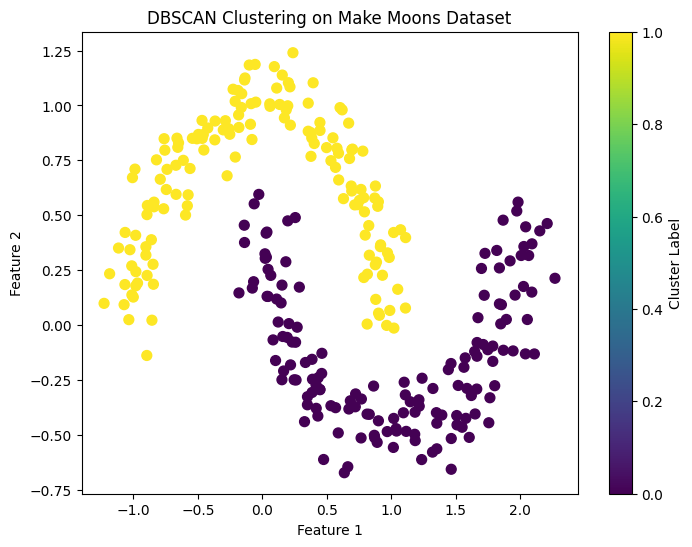

이상치 개수: 0


In [1]:
# 과제 1: 초승달 데이터셋 클러스터링
# 목표: 초승달 데이터셋(Make Moons)에서 DBSCAN을 사용해 군집을 생성하고 이상치를 탐지하세요.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. 데이터 생성 - make_moons 데이터셋으로 샘플 300개, 노이즈 0.1을 추가한 데이터셋 생성
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.2, min_samples=5) # DBSCAN 모델 초기화: eps(거리 임계값), min_samples(최소 샘플 개수) 설정
labels = dbscan.fit_predict(X) # DBSCAN 모델 학습 및 클러스터 예측

# 이상치 개수 확인 - 클러스터 레이블이 -1인 샘플의 개수
outliers = np.sum(labels == -1)

# 3. 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50) # 데이터 산점도: 각 포인트를 클러스터 레이블에 따라 색깔로 구분
plt.colorbar(label='Cluster Label') # 색상 막대 추가헤서 클러스터 레이블과 색상 매핑 표시
plt.title('DBSCAN Clustering on Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("이상치 개수:", outliers)

In [21]:
# 과제 2: 실제 데이터셋에서 이상치 탐지
# 목표: 와인 품질 데이터셋에서 DBSCAN을 사용하여 이상치를 탐지하세요.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# 1. 데이터 로드
data = load_wine()
X = data.data # 입력 데이터를 변수 X에 numpy 배열 형식으로 저장
feature_names = data.feature_names

# 2. 데이터 스케일링
scaler = StandardScaler() # StandardScaler 객체 생성 (평균 0, 분산 1로 표준화)
X_scaled = scaler.fit_transform(X) # 데이터를 스케일링하여 X_scaled에 저장

# 3. DBSCAN 모델 생성
eps = 4.0  # eps 값 -  DBSCAN에서 가까운 이웃을 정의하는 반경 (조정 가능)
min_samples = 3  # DBSCAN에서 하나의 클러스터로 인정할 최소 샘플 개수 (조정 가능)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# 4. 클러스터링 수행
# 데이터를 클러스터링하고 클러스터 레이블을 예측 (-1은 이상치, 0 이상은 클러스터)
labels = dbscan.fit_predict(X_scaled)

# 5. 결과 분석
# labels에서 고유값(클러스터 ID)와 각 ID의 개수를 계산
clusters, counts = np.unique(labels, return_counts=True)

outliers = np.sum(labels == -1)  # 이상치 (-1로 표시)
total_samples = len(labels)
outlier_ratio = outliers / total_samples

# 6. 출력
print(f"클러스터 개수: {len(clusters) - 1}")  # 이상치를 제외한 클러스터 개수
print(f"이상치 개수: {outliers}")
print(f"클러스터별 샘플 수:")
# 클러스터 ID와 해당 ID에 속한 데이터 개수를 pandas 시리즈로 저장
cluster_counts = pd.Series(labels).value_counts().sort_index()
print(cluster_counts) # 클러스터 ID별 데이터 개수를 출력


클러스터 개수: 1
이상치 개수: 0
클러스터별 샘플 수:
0    175
1      3
Name: count, dtype: int64


eps = 3.0  # eps 값 -  DBSCAN에서 가까운 이웃을 정의하는 반경

min_samples = 3  # DBSCAN에서 하나의 클러스터로 인정할 최소 샘플 개수
```
클러스터 개수: 2
이상치 개수: 7
클러스터별 샘플 수:
-1      7
 0    168
 1      3
```
**-> 클러스터 0: 168개의 데이터가 클러스터 0에 속합니다.**

이는 데이터의 대부분이 비교적 밀집된 영역에 속해 있으며,

DBSCAN의 eps 반경 및 min_samples 조건을 충족하는 데이터들이라는 것을 의미

**-> 클러스터 1: 3개의 데이터가 클러스터 1에 속합니다.**

이 클러스터는 매우 작으며, 데이터가 별도의 작은 그룹으로 존재하는 것으로 보입니다.

데이터의 분포가 드문드문 분리되어 있어 생긴 클러스터일 가능성

**-> 이상치 개수: 7개**

클러스터링 조건(eps와 min_samples)을 만족하지 못한 7개의 데이터가 -1로 표시되었습니다.

이 데이터들은 주변에 충분히 가까운 이웃 데이터가 없거나, 데이터 밀도가 낮은 영역에 위치한 것으로 판단

=> 클러스터 1의 크기가 매우 작음

클러스터 1에는 3개의 데이터만 포함되어 있어, 이 클러스터가 정말 의미 있는지 검토가 필요

의미 있는 소규모 클러스터: 이 데이터들이 다른 클러스터와 분명히 구별되는 특징을 가진다면, 클러스터 1은 중요할 수 있습니다.

노이즈 데이터 가능성: 클러스터 1에 속한 데이터가 단순히 소수의 가까운 데이터로 묶인 노이즈일 수도 있습니다.

**파라미터 최적화**

eps 값을 조금 더 키우거나, min_samples 값을 줄여보는 방법.

eps 값을 조금 키우면 클러스터 1이 클러스터 0과 합쳐질 가능성

min_samples 값을 줄이면 클러스터 1의 데이터를 이상치로 간주하지 않을 가능성이 높아짐.

eps = 4.0  # eps 값 -  DBSCAN에서 가까운 이웃을 정의하는 반경

min_samples = 3  # DBSCAN에서 하나의 클러스터로 인정할 최소 샘플 개수



```
클러스터 개수: 1
이상치 개수: 0
클러스터별 샘플 수:
0    175
1      3
```
이상치는 발견되지 않음.

-> eps 값을 크게 잡았거나, 데이터가 전반적으로 밀집되어 있음


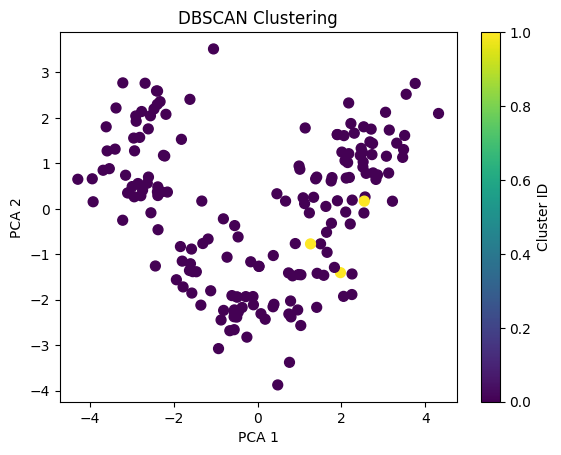

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA를 이용한 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()

In [24]:
# 클러스터별 데이터 특성 확인
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

# 각 클러스터의 평균값 출력
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# 클러스터별 샘플 크기
print(df['Cluster'].value_counts())

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        13.012000    2.355257  2.373371          19.540000   98.885714   
1        12.336667    1.233333  1.966667          16.866667  149.666667   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.298743      2.0332              0.363429         1.569371   
1             2.083333      1.8000              0.270000         2.846667   

         color_intensity       hue  od280/od315_of_diluted_wines     proline  
Cluster                                                                       
0               5.094229  0.953863                      2.610686  745.954286  
1               2.950000  1.166667                      2.670000  801.666667  
Cluster
0    175
1      3
Name: count, dtype: int64


클러스터 0은 일반적인 와인 특성을 반영하며, 클러스터링 결과에서 대부분의 데이터를 차지

*반면에 클러스터 1은 클러스터 0과 구별되는 특성을 가진 소수의 데이터를 나타냄*

malic_acid(말산 농도), magnesium(마그네슘 농도), proanthocyanins(프로안토시아닌 함량), proline(프로린) 등이 큰 차이를 나타냈으며, 이는 특정 유형의 와인 특성을 나타낼 가능성

In [25]:
# 클러스터 1 데이터 추출
cluster_1_data = df[df['Cluster'] == 1]
print(cluster_1_data.describe())  # 통계 요약 확인

         alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
count   3.000000    3.000000  3.000000           3.000000    3.000000   
mean   12.336667    1.233333  1.966667          16.866667  149.666667   
std     0.130128    0.267644  0.225462           2.100794   13.051181   
min    12.210000    0.990000  1.750000          14.800000  136.000000   
25%    12.270000    1.090000  1.850000          15.800000  143.500000   
50%    12.330000    1.190000  1.950000          16.800000  151.000000   
75%    12.400000    1.355000  2.075000          17.900000  156.500000   
max    12.470000    1.520000  2.200000          19.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       3.000000     3.00000              3.000000         3.000000   
mean        2.083333     1.80000              0.270000         2.846667   
std         0.361709     0.49689              0.113578         0.397157   
min         1.850000     1.28000          